In [1]:
!pip install ipython-autotime
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=0cc05e7e2293190eb68281b16dd1bbce6fae69ed327243588c2035989fcffbe6
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


### 데이터 다운로드

In [0]:
!ls -al

total 16
drwxr-xr-x 1 root root 4096 May 13 16:29 .
drwxr-xr-x 1 root root 4096 May 21 13:03 ..
drwxr-xr-x 1 root root 4096 May 18 16:14 .config
drwxr-xr-x 1 root root 4096 May 13 16:29 sample_data


In [0]:
!rm -rf ./datasets

In [0]:
!ls -al

total 16
drwxr-xr-x 1 root root 4096 May 13 16:29 .
drwxr-xr-x 1 root root 4096 May 21 13:03 ..
drwxr-xr-x 1 root root 4096 May 18 16:14 .config
drwxr-xr-x 1 root root 4096 May 13 16:29 sample_data


In [0]:
import os
import tarfile
from six.moves import urllib

DATA_DIR = "./datasets"

# 디렉토리 만들기
if not os.path.isdir(DATA_DIR):
    os.makedirs(DATA_DIR)

In [0]:
!ls -al

total 20
drwxr-xr-x 1 root root 4096 May 21 13:05 .
drwxr-xr-x 1 root root 4096 May 21 13:03 ..
drwxr-xr-x 1 root root 4096 May 18 16:14 .config
drwxr-xr-x 2 root root 4096 May 21 13:05 datasets
drwxr-xr-x 1 root root 4096 May 13 16:29 sample_data


In [0]:
!ls -al ./datasets/

total 8
drwxr-xr-x 2 root root 4096 May 21 13:05 .
drwxr-xr-x 1 root root 4096 May 21 13:05 ..


In [0]:
# housing.tgz 다운로드
DATA_PATH = os.path.join(DATA_DIR, "housing.tgz")
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz", 
    DATA_PATH)

('./datasets/housing.tgz', <http.client.HTTPMessage at 0x7f8f686ab358>)

In [0]:
!ls -al ./datasets/

total 408
drwxr-xr-x 2 root root   4096 May 21 13:05 .
drwxr-xr-x 1 root root   4096 May 21 13:05 ..
-rw-r--r-- 1 root root 409488 May 21 13:05 housing.tgz


In [0]:
# 압축 풀기
tgz_file = tarfile.open(DATA_PATH)
tgz_file.extractall(path=DATA_DIR)
tgz_file.close()


In [0]:
!ls -al ./datasets/

total 1800
drwxr-xr-x 2 root root     4096 May 21 13:05 .
drwxr-xr-x 1 root root     4096 May 21 13:05 ..
-rw-r--r-- 1  501 staff 1423529 May  3  2016 housing.csv
-rw-r--r-- 1 root root   409488 May 21 13:05 housing.tgz


#### 데이터 구조 살펴보기

In [0]:
# CSV 파일 읽기
import pandas as pd

def load_data(file_dir=DATA_DIR):
    csv_file = os.path.join(file_dir, "housing.csv")
    return pd.read_csv(csv_file)
    
housing = load_data()


In [0]:
type(housing)

pandas.core.frame.DataFrame

In [0]:
housing.head()

longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns]

In [0]:
!head -5 ./datasets/housing.csv

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [0]:
!tail -5 ./datasets/housing.csv

-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7,92300.0,INLAND
-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [0]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [0]:
housing.describe()

longitude      latitude  ...  median_income  median_house_value
count  20640.000000  20640.000000  ...   20640.000000        20640.000000
mean    -119.569704     35.631861  ...       3.870671       206855.816909
std        2.003532      2.135952  ...       1.899822       115395.615874
min     -124.350000     32.540000  ...       0.499900        14999.000000
25%     -121.800000     33.930000  ...       2.563400       119600.000000
50%     -118.490000     34.260000  ...       3.534800       179700.000000
75%     -118.010000     37.710000  ...       4.743250       264725.000000
max     -114.310000     41.950000  ...      15.000100       500001.000000

[8 rows x 9 columns]

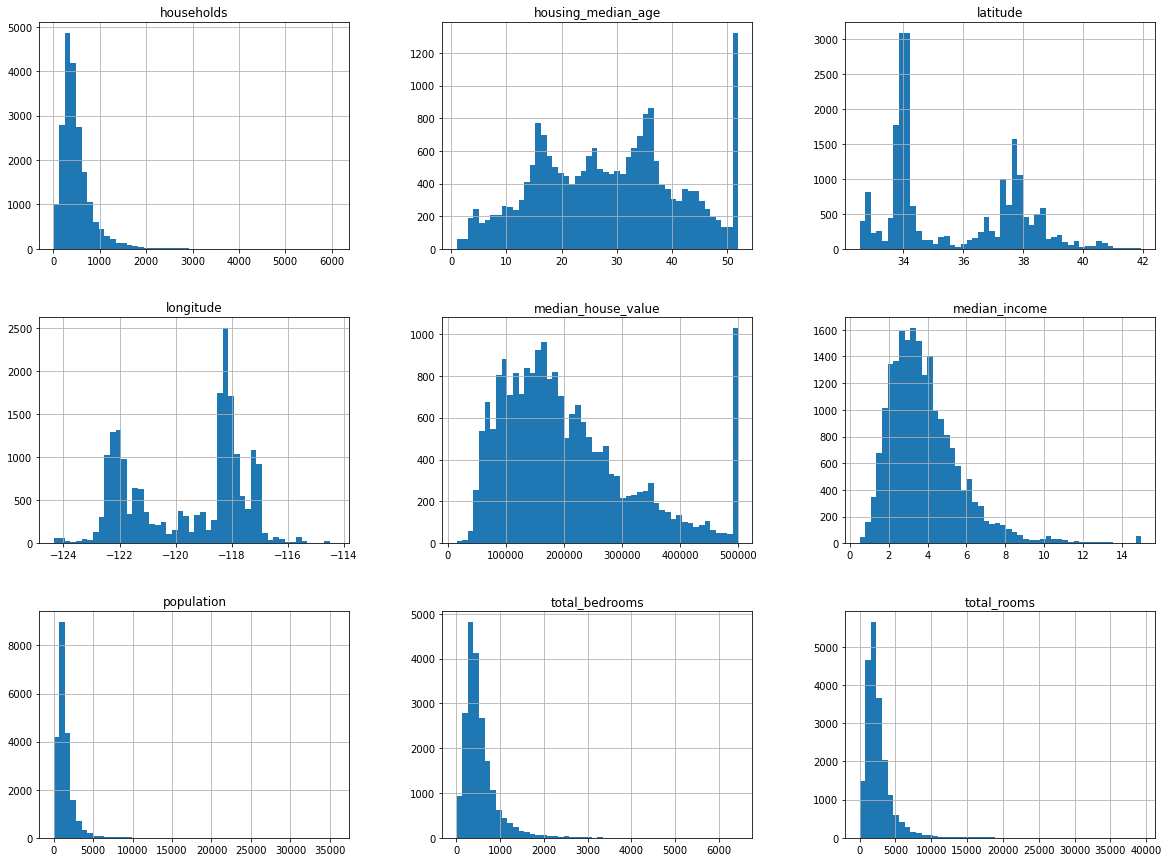

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()


#### 테스트 데이터 셋 만들기

In [0]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# train : test = 80 : 20
train_set, test_set = split_train_test(housing, 0.2)
print("train: {}, test: {}".format(len(train_set), len(test_set)))

train: 16512, test: 4128


In [0]:
from sklearn.model_selection import train_test_split

# train : test = 80 : 20
train_set, test_set = train_test_split(housing, 
                                       test_size=0.2, 
                                       random_state=42)
print("train: {}, test: {}".format(len(train_set), len(test_set)))

train: 16512, test: 4128


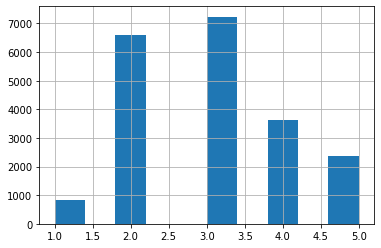

In [0]:
# 소득의 카테고리 만들기
# 1.5 : 소득 카테고리 수를 제한하기 위한 값 (1~10)
# set(housing['median_income'].astype(int))
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# 5 이상인 값은 5로 합침
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
# 히스토그램
housing["income_cat"].hist()

In [0]:
housing["income_cat"].describe()

count    20640.000000
mean         3.006686
std          1.054618
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: income_cat, dtype: float64

#### 계층 샘플링

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
# 소득 카테고리 비율 살펴보기
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [0]:
strat_train_set["income_cat"].hist()

In [0]:
strat_test_set["income_cat"].hist()

In [0]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [0]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

### 탐색과 시각화

#### 지리적 데이터 시각화

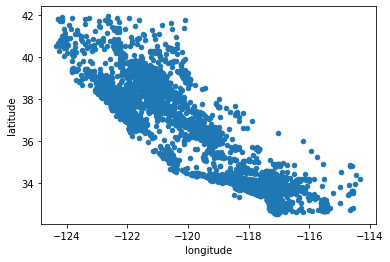

In [0]:
# 훈련 데이터 복사
housing = strat_train_set.copy()

# 위도, 경도에 따른 산점도 그리기
housing.plot(kind="scatter", x="longitude", y="latitude")

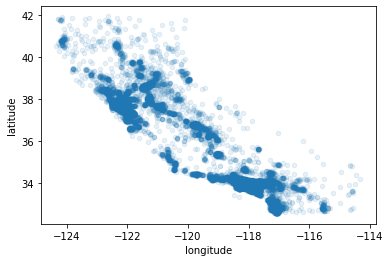

In [0]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

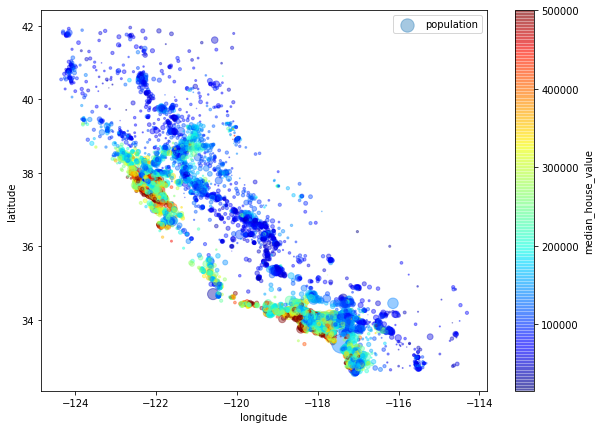

In [0]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value",
            cmap=plt.get_cmap("jet"),
            colorbar=True, sharex=False)
plt.legend()

In [0]:
type(housing)

pandas.core.frame.DataFrame

In [0]:
housing.corr()

longitude  latitude  ...  median_house_value  income_cat
longitude            1.000000 -0.924478  ...           -0.047432   -0.016243
latitude            -0.924478  1.000000  ...           -0.142724   -0.078848
housing_median_age  -0.105848  0.005766  ...            0.114110   -0.139385
total_rooms          0.048871 -0.039184  ...            0.135097    0.221690
total_bedrooms       0.076598 -0.072419  ...            0.047689    0.012502
population           0.108030 -0.115222  ...           -0.026920    0.022848
households           0.063070 -0.077647  ...            0.064506    0.034995
median_income       -0.019583 -0.075205  ...            0.687160    0.902156
median_house_value  -0.047432 -0.142724  ...            1.000000    0.642274
income_cat          -0.016243 -0.078848  ...            0.642274    1.000000

[10 rows x 10 columns]

In [0]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f681413c8>,
      dtype=object)

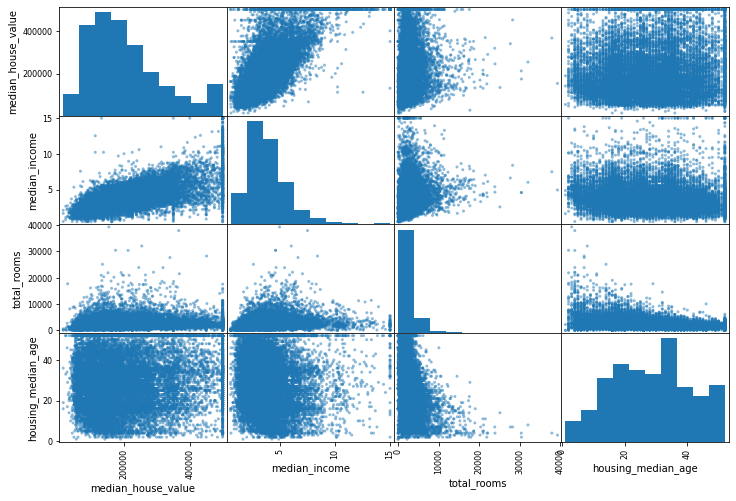

In [0]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income",
              "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

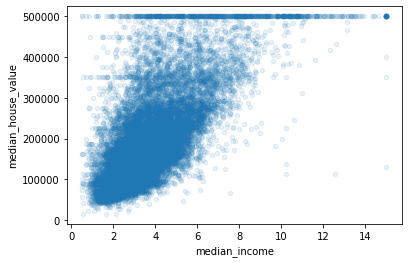

In [0]:
housing.plot(kind="scatter", x="median_income", 
             y="median_house_value", alpha=0.1)

#### 특성들의 조합

In [0]:
housing["rooms_per_household"] = \
    housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = \
    housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = \
    housing["population"]/housing["households"]

In [0]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 알고리즘용 데이터 준비

### 데이터 정제

In [0]:
# 훈련 데이터 복사
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16354
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [0]:
# 해당 구역을 제거
housing2 = housing.dropna(subset=["total_bedrooms"])
housing2.count()

longitude             16354
latitude              16354
housing_median_age    16354
total_rooms           16354
total_bedrooms        16354
population            16354
households            16354
median_income         16354
ocean_proximity       16354
income_cat            16354
dtype: int64

In [0]:
# 특정 값으로 채움
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
housing.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [0]:
# 전체 특성을 삭제
housing2 = housing.drop("total_bedrooms", axis=1)
housing2.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [0]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.22.2.post1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, joblib, scipy
Required-by: yellowbrick, umap-learn, textgenrnn, sklearn, sklearn-pandas, mlxtend, lucid, lightgbm, librosa, imbalanced-learn, fancyimpute


In [0]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

# 중간값으로 대체하는 객체 생성
# mean, median, most_frequent, constant
#imputer = Imputer(strategy="median")
imputer = SimpleImputer(strategy="median")

# 수치형 데이터만 선택
housing_num = housing.drop("ocean_proximity", axis=1)
# 학습 및 변환
imputer.fit(housing_num)
X = imputer.transform(housing_num)


In [0]:
# pandas DataFrame 으로 변환
housing_df = pd.DataFrame(X, columns=housing_num.columns,
                         index=list(housing.index.values))
housing_df.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
income_cat            16512
dtype: int64

In [0]:
housing.index

Int64Index([17606, 18632, 14650,  3230,  3555, 19480,  8879, 13685,  4937,
             4861,
            ...
            15270,  3754, 12166,  6003,  7364,  6563, 12053, 13908, 11159,
            15775],
           dtype='int64', length=16512)

In [0]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   income_cat          16512 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [0]:
housing.head()

longitude  latitude  ...  ocean_proximity  income_cat
17606    -121.89     37.29  ...        <1H OCEAN         2.0
18632    -121.93     37.05  ...        <1H OCEAN         5.0
14650    -117.20     32.77  ...       NEAR OCEAN         2.0
3230     -119.61     36.31  ...           INLAND         2.0
3555     -118.59     34.23  ...        <1H OCEAN         3.0

[5 rows x 10 columns]

#### 텍스트와 범주형 데이터

In [0]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [0]:
housing_cat.factorize()

(array([0, 0, 1, ..., 2, 0, 3]),
 Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object'))

In [0]:
type(housing_cat)

pandas.core.series.Series

In [0]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0])

In [0]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [0]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
# fit_transform()에는 2차원 배열을 넣어야 함
housing_cat_1hot = encoder.fit_transform(
                housing_cat_encoded.reshape(-1,1))
# 출력은 sparse matrix (scipy.sparse.csr.csr_matrix)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [0]:
type(housing_cat_1hot)

scipy.sparse.csr.csr_matrix

In [0]:
# shape : (16354, 5)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [0]:
housing_cat_1hot.toarray().shape

(16512, 5)

In [0]:
# OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
# 2차원(DataFrame) : reshape(-1,1)과 같은 효과
housing_cat_2d = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = \
            ordinal_encoder.fit_transform(housing_cat_2d)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [0]:
type(housing_cat_2d)

pandas.core.frame.DataFrame

In [0]:
housing_cat_2d.shape

(16512, 1)

In [0]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [0]:
# 2차원(DataFrame) : reshape(-1,1)과 같은 효과
housing_cat_2d = housing[["ocean_proximity"]]

# default : sparse=True
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_2d)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [0]:
# 2차원(DataFrame) : reshape(-1,1)과 같은 효과
housing_cat_2d = housing_cat.values.reshape(-1,1)

# default : sparse=True
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_2d)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [0]:
housing_cat

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
            ...    
6563         INLAND
12053        INLAND
13908        INLAND
11159     <1H OCEAN
15775      NEAR BAY
Name: ocean_proximity, Length: 16512, dtype: object

In [0]:
housing.describe()


longitude      latitude  ...  median_income    income_cat
count  16512.000000  16512.000000  ...   16512.000000  16512.000000
mean    -119.575834     35.639577  ...       3.875589      3.006541
std        2.001860      2.138058  ...       1.904950      1.054602
min     -124.350000     32.540000  ...       0.499900      1.000000
25%     -121.800000     33.940000  ...       2.566775      2.000000
50%     -118.510000     34.260000  ...       3.540900      3.000000
75%     -118.010000     37.720000  ...       4.744475      4.000000
max     -114.310000     41.950000  ...      15.000100      5.000000

[8 rows x 9 columns]

In [0]:
housing.iloc[:5]

longitude  latitude  ...  ocean_proximity  income_cat
17606    -121.89     37.29  ...        <1H OCEAN         2.0
18632    -121.93     37.05  ...        <1H OCEAN         5.0
14650    -117.20     32.77  ...       NEAR OCEAN         2.0
3230     -119.61     36.31  ...           INLAND         2.0
3555     -118.59     34.23  ...        <1H OCEAN         3.0

[5 rows x 10 columns]

In [0]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [0]:
housing_num=housing.drop("ocean_proximity",axis=1)
#imputer = Imputer(strategy="median")
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
X1 = imputer.transform(housing_num)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X2 = scaler.transform(X1)


In [0]:
X2


array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.42069842,
        -0.61493744, -0.95445595],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -1.02222705,
         1.33645936,  1.89030518],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.0933178 ,
        -0.5320456 , -0.95445595],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.71315642,
        -0.3167053 , -0.00620224],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.37545069,
         0.09812139, -0.00620224],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.3777909 ,
        -0.15779865, -0.00620224]])

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
#    ('imputer', Imputer(strategy="median")),
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [0]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.42069842,
        -0.61493744, -0.95445595],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -1.02222705,
         1.33645936,  1.89030518],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.0933178 ,
        -0.5320456 , -0.95445595],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.71315642,
        -0.3167053 , -0.00620224],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.37545069,
         0.09812139, -0.00620224],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.3777909 ,
        -0.15779865, -0.00620224]])

In [0]:
from sklearn.compose import ColumnTransformer

# list 타입
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 14)

In [0]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   income_cat          16512 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [0]:
housing_prepared.shape

(16512, 14)

## 모델 선택과 모델 학습

In [0]:
# 선형 회귀 모델 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# 학습
lin_reg.fit(housing_prepared, housing_labels)
# 예측
sample_data = housing.iloc[:5]
sample_labels = housing_labels.iloc[:5]
sample_data_prepared = full_pipeline.transform(sample_data)
print("predict:\n{}".format(lin_reg.predict(sample_data_prepared)))
print("target:\n{}".format(list(sample_labels)))

predict:
[205841.96139906 329060.05217695 205219.96047357  61859.01340291
 196908.23636333]
target:
[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]
time: 27.3 ms


In [0]:
from sklearn.metrics import mean_squared_error
housing_predict = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, 
                             housing_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68867.01067610044

time: 10.8 ms


In [0]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 모델 선택
tree_reg = DecisionTreeRegressor()
# 모델 학습
tree_reg.fit(housing_prepared, housing_labels)
# 예측
housing_predict = tree_reg.predict(housing_prepared)
# 평가
tree_mse = mean_squared_error(housing_labels, 
                             housing_predict)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

time: 223 ms


#### 교차 검증

In [0]:
from sklearn.model_selection import cross_val_score
# Linear regression
scores = cross_val_score(lin_reg, 
                         housing_prepared,
                         housing_labels, 
                         scoring="neg_mean_squared_error", 
                         cv=10)
scores_rmse = np.sqrt(-scores)
print("LinearRegression score:", scores_rmse.mean())
# Decisoin tree
scores = cross_val_score(tree_reg, 
                         housing_prepared,
                         housing_labels, 
                         scoring="neg_mean_squared_error", 
                         cv=10)
scores_rmse = np.sqrt(-scores)
print("DecisionTree score", scores_rmse.mean())

LinearRegression score: 69049.01752253593
DecisionTree score 69590.69686147344
time: 1.93 s


In [0]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(forest_reg, 
                         housing_prepared,
                         housing_labels, 
                         scoring="neg_mean_squared_error", 
                         cv=10)
scores_rmse = np.sqrt(-scores)
print("RandomForest score", scores_rmse.mean())

RandomForest score 49606.41599080741
time: 2min 2s


In [0]:
housing_predict = forest_reg.predict(housing_prepared)
np.sqrt(mean_squared_error(housing_labels, housing_predict))

18249.258600344598

time: 435 ms


#### Grid Search

In [0]:
from sklearn.model_selection import GridSearchCV
# 파라미터 조합
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10],
                                'max_features': [2,3,4]}
]
forest_reg = RandomForestRegressor()
# grid search
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

time: 49.4 s


In [0]:
# 최적값 확인
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

time: 5.79 ms


In [0]:
# score 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],
                             cvres["params"]):
    print(np.sqrt(-mean_score), params)

64739.40867925314 {'max_features': 2, 'n_estimators': 3}
56200.359632745225 {'max_features': 2, 'n_estimators': 10}
53737.17141825755 {'max_features': 2, 'n_estimators': 30}
62049.2083171591 {'max_features': 4, 'n_estimators': 3}
54520.34925437502 {'max_features': 4, 'n_estimators': 10}
52230.413253597864 {'max_features': 4, 'n_estimators': 30}
60575.22683058949 {'max_features': 6, 'n_estimators': 3}
54257.382125018936 {'max_features': 6, 'n_estimators': 10}
51571.54852640734 {'max_features': 6, 'n_estimators': 30}
60278.288217044064 {'max_features': 8, 'n_estimators': 3}
53602.99061833898 {'max_features': 8, 'n_estimators': 10}
51126.28276139102 {'max_features': 8, 'n_estimators': 30}
62353.2198869604 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55549.96878643901 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62215.45006113169 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54030.6738100191 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

#### 최종 모델 평가

In [0]:
# 최종 모델 선택
final_model = grid_search.best_estimator_

# test dataset 으로 평가
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# 전처리
X_test_prepared = full_pipeline.transform(X_test)
# 최종 예측
final_predict = final_model.predict(X_test_prepared)
# 평가
final_mse = mean_squared_error(y_test, final_predict)
final_rmse = np.sqrt(final_mse)
final_rmse

48359.016382793445

time: 72.9 ms


In [0]:
!ls -al

total 20
drwxr-xr-x 1 root root 4096 May 21 13:05 .
drwxr-xr-x 1 root root 4096 May 21 13:03 ..
drwxr-xr-x 1 root root 4096 May 18 16:14 .config
drwxr-xr-x 2 root root 4096 May 21 13:05 datasets
drwxr-xr-x 1 root root 4096 May 13 16:29 sample_data
time: 3.89 s


## 제출


In [0]:
#!rm -rf *.csv

time: 2.12 s


In [0]:
from google.colab import files
files.upload()

Saving submitSample.csv to submitSample.csv


{'submitSample.csv': b'id,median_house_value\r\n1,\r\n2,\r\n3,\r\n4,\r\n5,\r\n6,\r\n7,\r\n8,\r\n9,\r\n10,\r\n11,\r\n12,\r\n13,\r\n14,\r\n15,\r\n16,\r\n17,\r\n18,\r\n19,\r\n20,\r\n21,\r\n22,\r\n23,\r\n24,\r\n25,\r\n26,\r\n27,\r\n28,\r\n29,\r\n30,\r\n31,\r\n32,\r\n33,\r\n34,\r\n35,\r\n36,\r\n37,\r\n38,\r\n39,\r\n40,\r\n41,\r\n42,\r\n43,\r\n44,\r\n45,\r\n46,\r\n47,\r\n48,\r\n49,\r\n50,\r\n51,\r\n52,\r\n53,\r\n54,\r\n55,\r\n56,\r\n57,\r\n58,\r\n59,\r\n60,\r\n61,\r\n62,\r\n63,\r\n64,\r\n65,\r\n66,\r\n67,\r\n68,\r\n69,\r\n70,\r\n71,\r\n72,\r\n73,\r\n74,\r\n75,\r\n76,\r\n77,\r\n78,\r\n79,\r\n80,\r\n81,\r\n82,\r\n83,\r\n84,\r\n85,\r\n86,\r\n87,\r\n88,\r\n89,\r\n90,\r\n91,\r\n92,\r\n93,\r\n94,\r\n95,\r\n96,\r\n97,\r\n98,\r\n99,\r\n100,\r\n101,\r\n102,\r\n103,\r\n104,\r\n105,\r\n106,\r\n107,\r\n108,\r\n109,\r\n110,\r\n111,\r\n112,\r\n113,\r\n114,\r\n115,\r\n116,\r\n117,\r\n118,\r\n119,\r\n120,\r\n121,\r\n122,\r\n123,\r\n124,\r\n125,\r\n126,\r\n127,\r\n128,\r\n129,\r\n130,\r\n131,\r\n132,\r\n133,

time: 8.55 s


In [0]:
!ls -al

total 1316
drwxr-xr-x 1 root root    4096 May 21 14:29 .
drwxr-xr-x 1 root root    4096 May 21 13:03 ..
drwxr-xr-x 1 root root    4096 May 18 16:14 .config
drwxr-xr-x 2 root root    4096 May 21 13:05 datasets
drwxr-xr-x 1 root root    4096 May 13 16:29 sample_data
-rw-r--r-- 1 root root  154037 May 21 14:29 submitSample.csv
-rw-r--r-- 1 root root 1167524 May 21 14:24 test.csv
time: 2.09 s


In [0]:
df_test = pd.read_csv("test.csv")
df_test.head()

id  longitude  latitude  ...  households  median_income  ocean_proximity
0   1    -122.23     37.88  ...         126         8.3252         NEAR BAY
1   2    -122.22     37.86  ...        1138         8.3014         NEAR BAY
2   3    -122.24     37.85  ...         177         7.2574         NEAR BAY
3   4    -122.25     37.85  ...         219         5.6431         NEAR BAY
4   5    -122.25     37.85  ...         259         3.8462         NEAR BAY

[5 rows x 10 columns]

time: 58.1 ms


In [0]:
# read test data
df_test = pd.read_csv("test.csv")

# 전처리
df_test = df_test.drop("id", axis=1)
df_test["income_cat"] = np.ceil(housing["median_income"] / 1.5)
X_test = full_pipeline.transform(df_test)
df_test.head()

longitude  latitude  ...  ocean_proximity  income_cat
0    -122.23     37.88  ...         NEAR BAY         6.0
1    -122.22     37.86  ...         NEAR BAY         6.0
2    -122.24     37.85  ...         NEAR BAY         5.0
3    -122.25     37.85  ...         NEAR BAY         4.0
4    -122.25     37.85  ...         NEAR BAY         3.0

[5 rows x 10 columns]

time: 68.7 ms


In [0]:
X_test

array([[-1.32588998,  1.04790939,  0.9819119 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.32089447,  1.03855482, -0.60862818, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33088548,  1.03387753,  1.85670895, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.82134397,  1.77288844, -0.92673619, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87129902,  1.77288844, -0.84720919, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83133498,  1.74482474, -1.0062632 , ...,  0.        ,
         0.        ,  0.        ]])

time: 3.92 ms


In [0]:
# 최종 예측
final_predict = final_model.predict(X_test)


time: 114 ms


In [0]:
final_predict.shape

(20640,)

time: 3.29 ms


In [0]:
submission = pd.read_csv("submitSample.csv")
submission.head()

id  median_house_value
0   1                 NaN
1   2                 NaN
2   3                 NaN
3   4                 NaN
4   5                 NaN

time: 31.4 ms


In [0]:
submission["median_house_value"] = final_predict
submission.head()

id  median_house_value
0   1       444626.766667
1   2       366556.666667
2   3       379150.000000
3   4       345636.700000
4   5       303180.000000

time: 9.74 ms


In [0]:
submission.to_csv('MySubmission.csv', index=False)

time: 135 ms


In [0]:
!ls -al

total 1740
drwxr-xr-x 1 root root    4096 May 21 14:29 .
drwxr-xr-x 1 root root    4096 May 21 13:03 ..
drwxr-xr-x 1 root root    4096 May 18 16:14 .config
drwxr-xr-x 2 root root    4096 May 21 13:05 datasets
-rw-r--r-- 1 root root  430805 May 21 14:29 MySubmission.csv
drwxr-xr-x 1 root root    4096 May 13 16:29 sample_data
-rw-r--r-- 1 root root  154037 May 21 14:29 submitSample.csv
-rw-r--r-- 1 root root 1167524 May 21 14:24 test.csv
time: 2.78 s


In [0]:
!head -5 MySubmission.csv

id,median_house_value
1,444626.76666666666
2,366556.6666666667
3,379150.0
4,345636.7
time: 2.65 s


In [0]:
!tail -5 MySubmission.csv

20636,80050.0
20637,82303.33333333333
20638,95336.66666666667
20639,88176.66666666667
20640,99840.0
time: 2.4 s


In [0]:
from google.colab import files
files.download("MySubmission.csv")

time: 3.39 s
